<a href="https://colab.research.google.com/github/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_08_Wayne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #08
### XAI in LLMs

Instructions


2. Visualize the embedding space of an embedding model on the MTEB leaderboard using tSNE, PCA, and UMAP. Compare/contrast the approaches.


Deliverable is a Google Colab notebook (webpage or blog also acceptable). Make sure to include documentation and a summary of your results. Include any interesting findings!





### Wayne Yang
#### https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_08_Wayne.ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1z5YrmhfdNqaBKOdi-gcI6ADQfZVDpKfp#scrollTo=M70WQI8kmUJq)


In [26]:
!rm -r ./sample_data

In [27]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data


# Clone GitHub files to colab workspace
repo_name = "Duke_xAI_Wayne" # Change to your repo name
git_path = 'https://github.com/Trip1ewhy/Duke_xAI_Wayne.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment #02_Wayne'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke_xAI_Wayne'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 177 (delta 20), reused 4 (delta 4), pack-reused 135 (from 1)
Receiving objects: 100% (177/177), 89.36 MiB | 19.69 MiB/s, done.
Resolving deltas: 100% (57/57), done.
[Errno 2] No such file or directory: 'Duke_xAI_Wayne/Assignment #02_Wayne'
/content
Duke_xAI_Wayne/


In [1]:
pip install scikit-learn umap-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00


In [2]:
pip uninstall -y transformer-engine


In [3]:
pip install transformers==4.42.4 sentence-transformers==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [4]:
pip install xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 63.4 MB/s eta 0:00:00


In [5]:
pip install datasets

ERROR: Operation cancelled by user


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sentence_transformers import SentenceTransformer

## Build Embeddings

//setup codes are from huggingface dunzhang/stella_en_400M_v5 model card, whose model size is much smaller

In [29]:

# This model supports two prompts: "s2p_query" and "s2s_query" for sentence-to-passage and sentence-to-sentence tasks, respectively.
# They are defined in `config_sentence_transformers.json`

query_prompt_name = "s2p_query"

#Change queries and docs to xAI related
queries = [
    "How do students and teachers study the interpretability of algorithms?",
    "Why is it important for humans to understand AI?",
    "What will the collaboration between humans and AI look like in the future?",
    "What are the goals of testing AI systems for interpretability?"
]

# docs do not need any prompts
docs = [
    "Students and teachers explore algorithm interpretability by studying how models make decisions and identifying potential biases.",
    "Humans need to understand AI to ensure its decisions align with ethical guidelines and societal needs.",
    "In the future, humans and AI will collaborate closely, with AI assisting in decision-making and humans overseeing its impact.",
    "Testing AI interpretability helps improve transparency, making models more reliable and easier to understand."
]
# ！The default dimension is 1024, if you need other dimensions, please clone the model and modify `modules.json` to replace `2_Dense_1024` with another dimension, e.g. `2_Dense_256` or `2_Dense_8192` !
# on gpu
model = SentenceTransformer("dunzhang/stella_en_400M_v5", trust_remote_code=True).cuda()
# you can also use this model without the features of `use_memory_efficient_attention` and `unpad_inputs`. It can be worked in CPU.
# model = SentenceTransformer(
#     "dunzhang/stella_en_400M_v5",
#     trust_remote_code=True,
#     device="cpu",
#     config_kwargs={"use_memory_efficient_attention": False, "unpad_inputs": False}
# )
query_embeddings = model.encode(queries, prompt_name=query_prompt_name)
doc_embeddings = model.encode(docs)
print(query_embeddings.shape, doc_embeddings.shape)
# (2, 1024) (2, 1024)

#similarities = model.similarity(query_embeddings, doc_embeddings)
#print(similarities)
# tensor([[0.8398, 0.2990],
#         [0.3282, 0.8095]])




Some weights of the model checkpoint at dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/sentence_transformers/models/Dense.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECU

(4, 1024) (4, 1024)


## Comparison PCA, t-SNE and UMAP



### 1. **PCA (Principal Component Analysis)**:
   - **How it works**: PCA is a linear dimensionality reduction technique that projects the data onto a lower-dimensional subspace that captures the maximum variance. It finds principal components (orthogonal directions) and orders them based on how much variance in the data they explain.
   - **Strengths**:
     - **Efficient and fast**: PCA is computationally simple and scales well with large datasets.
     - **Captures global structure**: Since PCA uses variance maximization, it preserves large-scale relationships between data points, such as distance and direction in the original space.
   - **Weaknesses**:
     - **Only captures linear relationships**: PCA can't handle non-linear patterns in data, making it less useful for complex datasets with intricate relationships.
     - **Limited clustering ability**: Since it relies on linear projections, PCA is not ideal for identifying well-defined clusters in the data.
---

### 2. **t-SNE (t-distributed Stochastic Neighbor Embedding)**:
   - **How it works**: t-SNE is a non-linear dimensionality reduction technique designed to preserve **local** relationships. It converts high-dimensional pairwise distances into probabilities representing similarities between points and tries to minimize the difference between high-dimensional and low-dimensional similarity distributions.
   - **Strengths**:
     - **Captures local structure**: t-SNE is excellent at ensuring that nearby points in high-dimensional space remain close in low-dimensional space, making it ideal for revealing small clusters.
     - **Effective for visualizing complex data**: Especially useful for visualizing embeddings or high-dimensional data like images, texts, or gene expression profiles, t-SNE often produces clear and interpretable clusters.
   - **Weaknesses**:
     - **Poor global structure preservation**: While t-SNE captures local clusters well, it often distorts the relative distances and relationships between far-apart points, leading to misleading representations of global structure.
     - **High computational cost**: t-SNE is slower compared to PCA and UMAP, especially when used on large datasets. It also requires careful tuning of parameters like perplexity.
     - **Non-deterministic**: Multiple runs of t-SNE can yield different results unless a random seed is specified.

---

### 3. **UMAP (Uniform Manifold Approximation and Projection)**:
   - **How it works**: UMAP is another non-linear dimensionality reduction technique, but it differs from t-SNE in that it balances **local** and **global** structure better. It uses a mathematical framework from Riemannian geometry to construct a graph of the data and then optimizes this graph's low-dimensional representation.
   - **Strengths**:
     - **Preserves both local and global structure**: UMAP captures local neighborhoods (similar to t-SNE) but also retains some of the global structure of the data, providing a more balanced view of both small-scale and large-scale relationships.
     - **Faster than t-SNE**: UMAP is computationally more efficient than t-SNE, especially for large datasets.
     - **Deterministic**: Unlike t-SNE, UMAP tends to produce more consistent results across multiple runs.
   - **Weaknesses**:
     - **Parameter sensitivity**: UMAP has several parameters (like `n_neighbors` and `min_dist`) that require tuning to get optimal results, and these can affect the output significantly.


//Organized with the help of ChatGPT.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


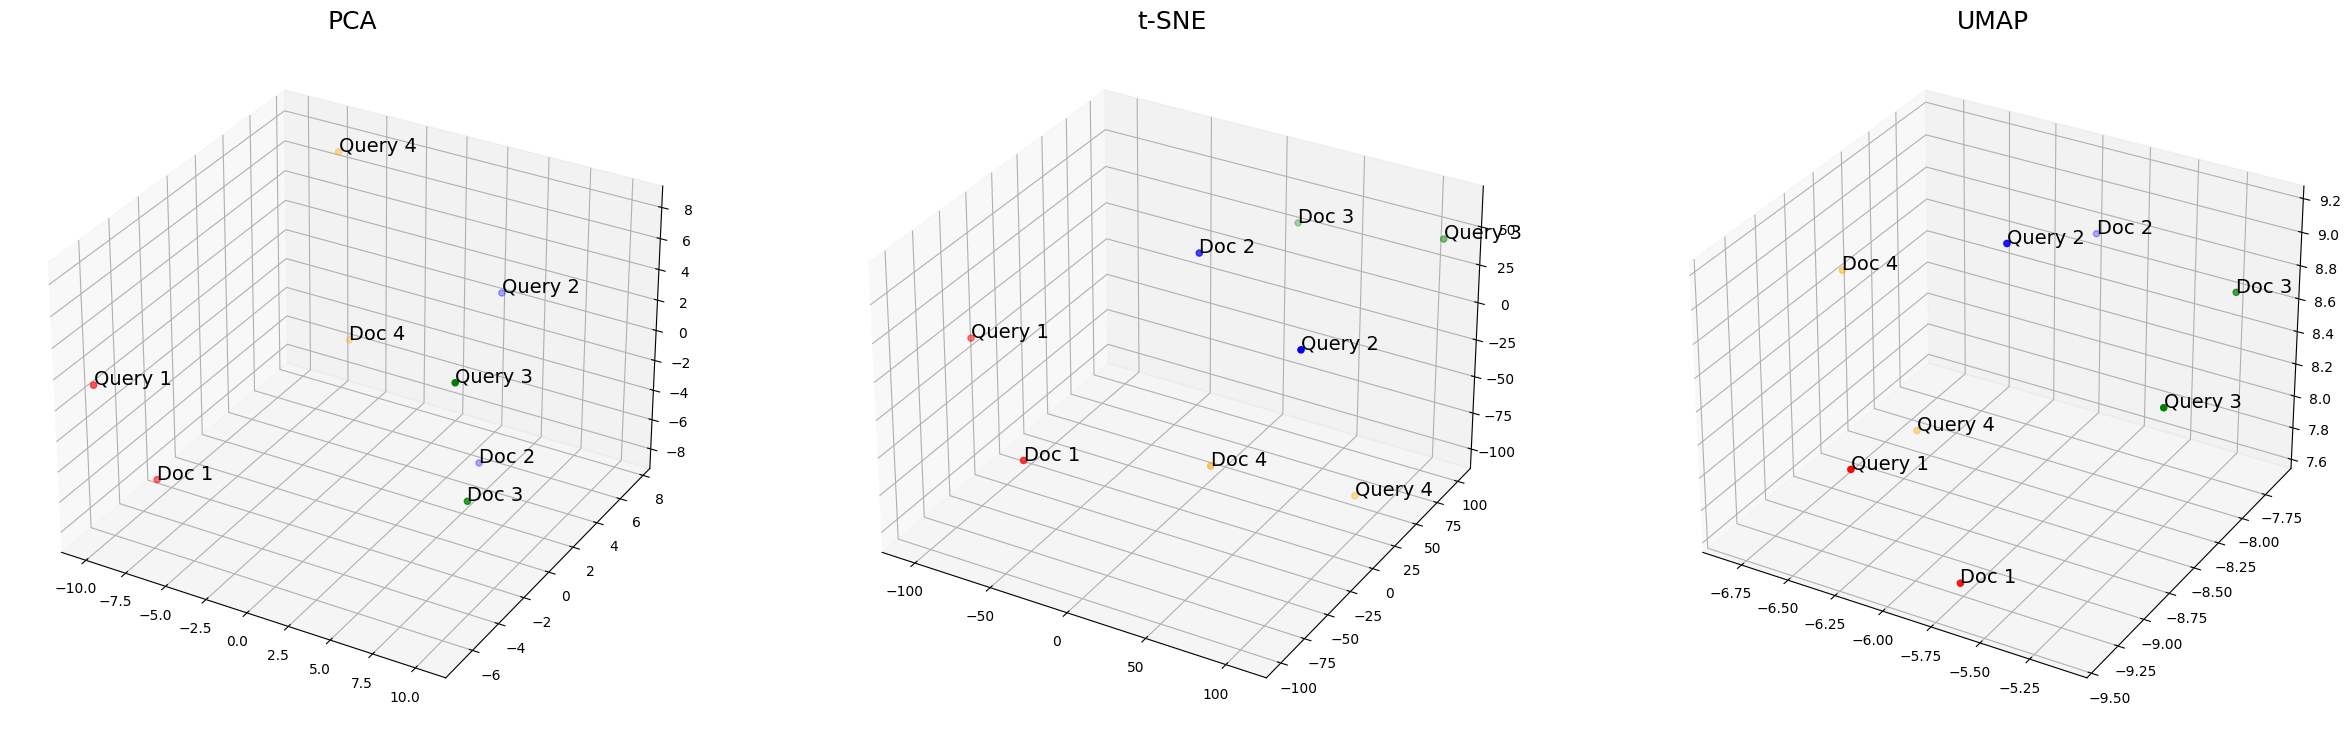

In [30]:
# query_embeddings = model.encode(queries, prompt_name=query_prompt_name)
# doc_embeddings = model.encode(docs)

# Combine query and doc embeddings for visualization
combined_embeddings = np.vstack((query_embeddings, doc_embeddings))
labels = ['Query 1', 'Query 2', 'Query 3', 'Query 4', 'Doc 1', 'Doc 2', 'Doc 3', 'Doc 4']

# PCA
pca = PCA(n_components=3)  # Use 3 components for 3D visualization
pca_result = pca.fit_transform(combined_embeddings)

# t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=5)  # 3 components for 3D
tsne_result = tsne.fit_transform(combined_embeddings)

# UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)  # 3 components for 3D
umap_result = umap_model.fit_transform(combined_embeddings)

# Plotting the results
fig = plt.figure(figsize=(30, 10))

# PCA 3D plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=['red', 'blue', 'green', 'orange', 'red', 'blue', 'green', 'orange'])
for i, label in enumerate(labels):
    ax1.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], label, fontsize=14)
ax1.set_title('PCA', fontsize=18)

# t-SNE 3D plot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=['red', 'blue', 'green', 'orange', 'red', 'blue', 'green', 'orange'])
for i, label in enumerate(labels):
    ax2.text(tsne_result[i, 0], tsne_result[i, 1], tsne_result[i, 2], label, fontsize=14)
ax2.set_title('t-SNE', fontsize=18)

# UMAP 3D plot
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c=['red', 'blue', 'green', 'orange', 'red', 'blue', 'green', 'orange'])
for i, label in enumerate(labels):
    ax3.text(umap_result[i, 0], umap_result[i, 1], umap_result[i, 2], label, fontsize=14)
ax3.set_title('UMAP', fontsize=18)

plt.show()


## Figures summarization

### 1. **PCA (Principal Component Analysis)**:
   - The plot shows a relatively uniform spread of the queries and documents.
   - **Queries 1 and 4** are close to **Documents 1 and 4**, suggesting that PCA is capturing some meaningful relationships between similar queries and documents.
   - While **Queries 2 and 3** and **Documents 2 and 3** are kind of confused

### 2. **t-SNE (t-distributed Stochastic Neighbor Embedding)**:
   - t-SNE shows a more distinct clustering of points.
   - The relevance between the query and the document was not demonstrated.
   - However, **Queries 3 and 4** and their respective documents are more spread out, and the global relationships seem distorted compared to PCA.

### 3. **UMAP (Uniform Manifold Approximation and Projection)**:
   - UMAP shows some clustering similar to t-SNE but retains better global structure.
   - Better relevance between query and document
   - UMAP balances the preservation of both local and global structure better than t-SNE, making it a suitable method for embedding visualization.

//Organized with the help of ChatGPT.


According to the figures, UMAP is the most suitable method for visualizing embeddings from a sentence transformer. It balances both local clustering (similar sentences close together) and global relationships (how different sentence clusters relate), while being computationally more efficient than t-SNE, especially for larger datasets.